# Top

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime

#Custom
import finance_utils as fu
import ystockquote as ysq
import technical_indicators as ti
import stock_db_mgr as sdm

In [3]:
# Adjust figure size to be bigger:
plt.rcParams['figure.figsize'] = [15, 6]

In [4]:
# Set seaborn plot theme:
sns.set_theme()

TOC navigation bar

Other option: https://github.com/shoval/jupyter-navbar

In [5]:
%%javascript
$('<div id="toc"></div>').css({position: 'fixed', top: '120px', left: 0}).appendTo(document.body);
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>

In [5]:
sys.version

'3.6.9 (default, Dec  8 2021, 21:08:43) \n[GCC 8.4.0]'

In [6]:
sys.version_info

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)

In [7]:
np.__version__

'1.19.5'

In [8]:
pd.__version__

'1.1.5'

In [9]:
sns.__version__

'0.11.2'

# Technical Indicator Tests

## Utility math function

In [7]:
# stop is excluded
t = np.arange(-5, 6, 1)
t

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [8]:
s = ti.step(t)
s

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [9]:
r = ti.ramp(t)
r

array([-0., -0., -0., -0., -0.,  0.,  1.,  2.,  3.,  4.,  5.])

<StemContainer object of 3 artists>

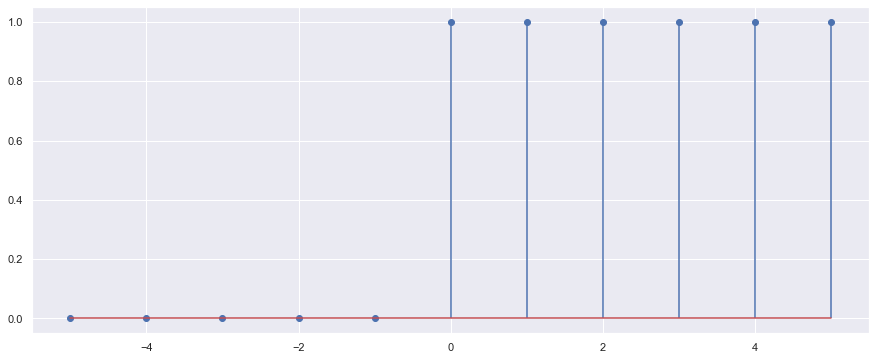

In [10]:
plt.stem(t, s)

<StemContainer object of 3 artists>

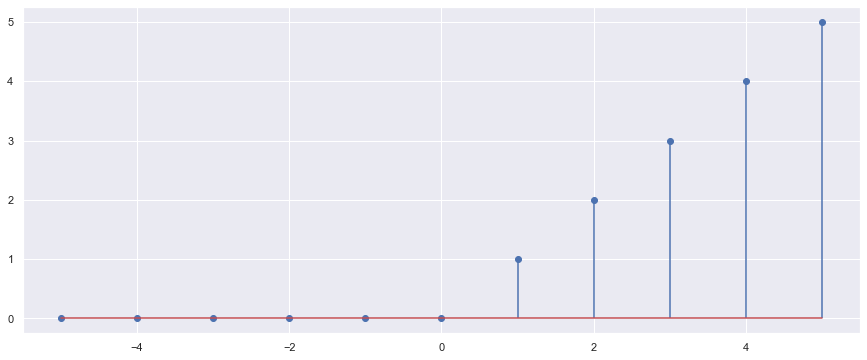

In [11]:
plt.stem(t, r)

## Crossing detection

In [55]:
x1 = np.array([1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0]) + 1
x2 = np.ones(len(x1)) * 2
x = np.arange(len(x1))

In [60]:
o = ti.cross_over(x1, x2)
o

array([False, False,  True, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False])

In [61]:
u = ti.cross_under(x1, x2)
u

array([False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False, False,  True, False, False])

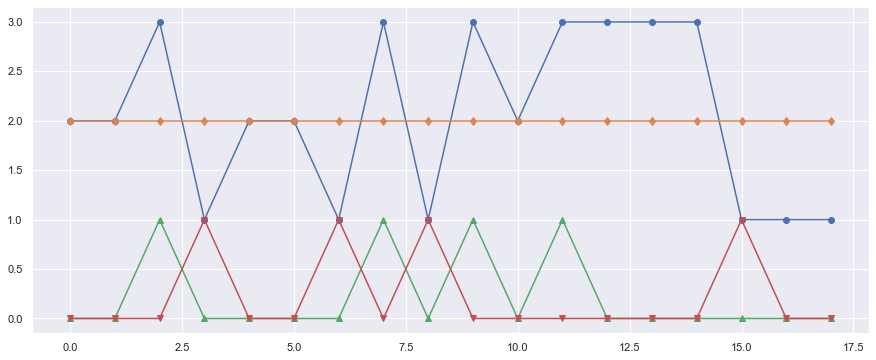

In [62]:
#plt.plot(x, o)
plt.plot(x, x1, marker='o')
plt.plot(x, x2, marker='d')
plt.plot(x, o, marker='^')
plt.plot(x, u, marker='v')

In [74]:
t = np.linspace(0, 4 * np.pi, 50)
s = np.sin(t)
c = np.cos(t * 1.7)
o = ti.cross_over(s, c)
u = ti.cross_under(s, c)

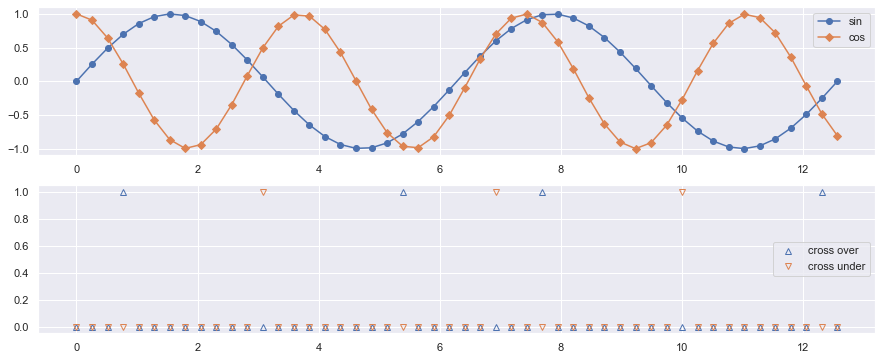

In [76]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(t, s, marker='o', label='sin')
ax.plot(t, c, marker='D', label='cos')
ax.legend()

ax2 = fig.add_subplot(212)
ax2.plot(t, o, marker='^', markerfacecolor='None', linestyle='None', label='cross over')
ax2.plot(t, u, marker='v', markerfacecolor='None', linestyle='None', label='cross under')
ax2.legend()

# Finance Utils

In [19]:
fu.calc_commission(34)

5.069

In [20]:
fu.calc_commission_etf(34)

0.11900000000000001

In [10]:
f = 'stock_db/test/SPY.csv'
df = fu.load_data_frame(f, datetime.date(2018, 1, 1), datetime.date(2018, 4, 1), True)

In [15]:
len(df.index[df.index.duplicated()].unique())

0

# Yahoo Test

In [21]:
s = 'XBB.TO'
ysq.get_52_week_high(s)

32.4

In [22]:
ysq.get_52_week_low(s)

29.98

In [23]:
ysq.get_price(s)

30.4

In [24]:
# TBD: bug in some ETF dividend
#ysq.get_dividend_yield('ZCN.TO')

In [25]:
#ysq.get_dividend_yield('VUN.TO')

# Stock DB Manager

In [56]:
db = sdm.StockDBMgr('stock_db/qt')

In [57]:
sym_list = db.get_all_symbols()
sym_list

['VUN.TO', 'XBB.TO', 'XEC.TO', 'XEF.TO', 'ZCN.TO']

In [58]:
for s in sym_list:
    print(db.validate_symbol_data(s))

True
True
True
True
True


In [20]:
db.update_all_symbols()

Downloading:VUN.TO ...
Downloading:XBB.TO ...
Downloading:XEC.TO ...
Downloading:XEF.TO ...
Downloading:ZCN.TO ...


In [59]:
s = sym_list[0]
s

'VUN.TO'

In [60]:
df = db.get_symbol_data(s)
df.head()

DATA,Open,High,Low,Close,Volume
Date,,,,,
2013-08-12,21.851347,21.851347,21.833547,21.851347,7300.0
2013-08-13,21.993764,22.002665,21.940361,22.002665,2100.0
2013-08-14,21.958162,21.958162,21.851352,21.869154,6300.0
2013-08-15,21.717836,21.717836,21.486416,21.486416,8400.0
2013-08-16,21.539822,21.602127,21.459716,21.486416,5400.0


In [61]:
df.tail()

DATA,Open,High,Low,Close,Volume
Date,,,,,
2022-03-04,75.809998,75.879997,74.900002,75.379997,29300.0
2022-03-07,75.099998,75.400002,73.529999,73.529999,54800.0
2022-03-08,73.669998,75.279999,73.209999,73.629997,54300.0
2022-03-09,74.449997,75.430000,74.370003,75.120003,56900.0
2022-03-10,74.089996,74.690002,73.750000,74.570000,30642.0


<AxesSubplot:xlabel='Date'>

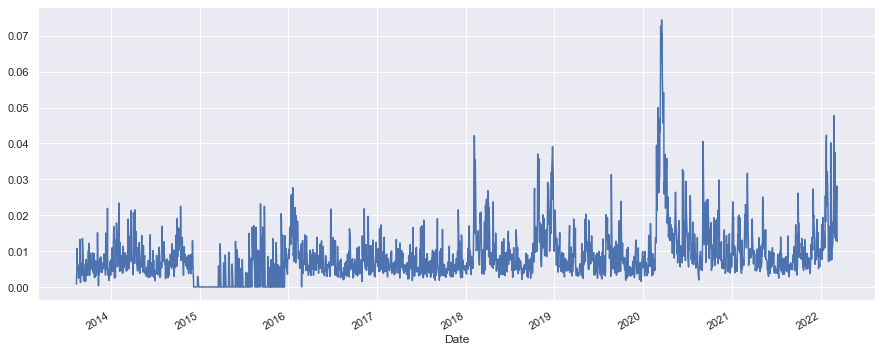

In [62]:
((df['High'] - df['Low']) / df['Close']).plot()

In [63]:
b = 'XXX'

In [64]:
db.download_data(b)

Downloading:XXX ...

ERROR: Symbol not found: XXX


In [65]:
db.get_symbol_data(b)

Downloading:XXX ...

ERROR: Symbol not found: XXX
<class 'FileNotFoundError'>
(2, 'No such file or directory')
[Errno 2] No such file or directory: 'stock_db/qt/XXX.csv'
Error parsing stock_db/qt/XXX.csv
ERROR: data for XXX contains error


In [67]:
dfa = db.get_all_symbol_single_data_item('Close')
dfa.describe()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
count,2153.000000,5347.000000,2235.000000,2235.000000,2965.000000
mean,45.960031,22.105509,22.556004,25.810444,17.327695
std,15.702804,5.819099,4.345240,4.864426,4.311493
min,21.361809,12.270441,14.700091,15.931493,11.006385
25%,33.902744,16.828468,18.548192,22.212389,13.452983
50%,43.700363,22.148849,22.769306,26.113396,16.693855
75%,54.412228,27.222136,25.526078,28.742826,19.867596
max,84.363998,32.746593,33.072247,36.347157,29.085384


In [68]:
dfa

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,NaN,12.700972,NaN,NaN,NaN
2000-11-24,NaN,12.677054,NaN,NaN,NaN
2000-11-27,NaN,12.677054,NaN,NaN,NaN
2000-11-28,NaN,12.748814,NaN,NaN,NaN
2000-11-29,NaN,12.772730,NaN,NaN,NaN
...,...,...,...,...,...
2022-03-04,75.379997,30.639999,26.809999,31.090000,28.809999
2022-03-07,73.529999,30.400000,25.969999,30.290001,28.680000
2022-03-08,73.629997,30.200001,26.260000,30.690001,28.610001


<AxesSubplot:xlabel='Date'>

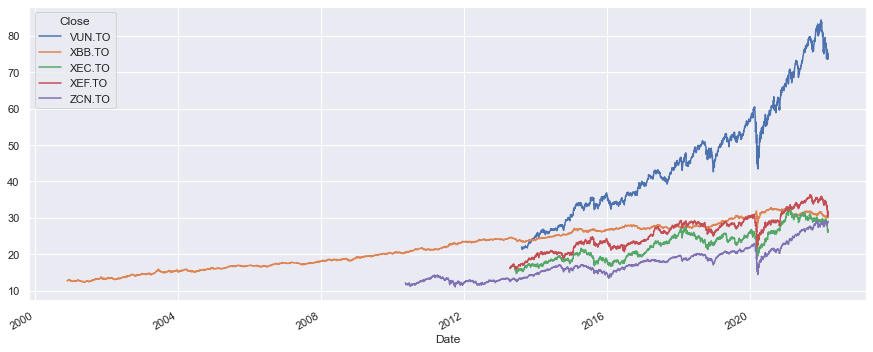

In [69]:
dfa.plot()

## N/A Testing

In [70]:
dfa.isna()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,True,False,True,True,True
2000-11-24,True,False,True,True,True
2000-11-27,True,False,True,True,True
2000-11-28,True,False,True,True,True
2000-11-29,True,False,True,True,True
...,...,...,...,...,...
2022-03-04,False,False,False,False,False
2022-03-07,False,False,False,False,False
2022-03-08,False,False,False,False,False


In [71]:
# Logical NOT
~(dfa.isna())

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,False,True,False,False,False
2000-11-24,False,True,False,False,False
2000-11-27,False,True,False,False,False
2000-11-28,False,True,False,False,False
2000-11-29,False,True,False,False,False
...,...,...,...,...,...
2022-03-04,True,True,True,True,True
2022-03-07,True,True,True,True,True
2022-03-08,True,True,True,True,True


In [72]:
dfa.notna()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,False,True,False,False,False
2000-11-24,False,True,False,False,False
2000-11-27,False,True,False,False,False
2000-11-28,False,True,False,False,False
2000-11-29,False,True,False,False,False
...,...,...,...,...,...
2022-03-04,True,True,True,True,True
2022-03-07,True,True,True,True,True
2022-03-08,True,True,True,True,True


In [73]:
# .mul(1) to convert bool to 0-1
# This is equivalent to * 1 (multiply by 1)
dfa.isna().mul(1)

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,1,0,1,1,1
2000-11-24,1,0,1,1,1
2000-11-27,1,0,1,1,1
2000-11-28,1,0,1,1,1
2000-11-29,1,0,1,1,1
...,...,...,...,...,...
2022-03-04,0,0,0,0,0
2022-03-07,0,0,0,0,0
2022-03-08,0,0,0,0,0


In [74]:
dfa.isna().any()

Close
VUN.TO     True
XBB.TO    False
XEC.TO     True
XEF.TO     True
ZCN.TO     True
dtype: bool

In [75]:
dfa.isna().any(axis='columns').head()

Date
2000-11-23    True
2000-11-24    True
2000-11-27    True
2000-11-28    True
2000-11-29    True
dtype: bool

<AxesSubplot:xlabel='Date'>

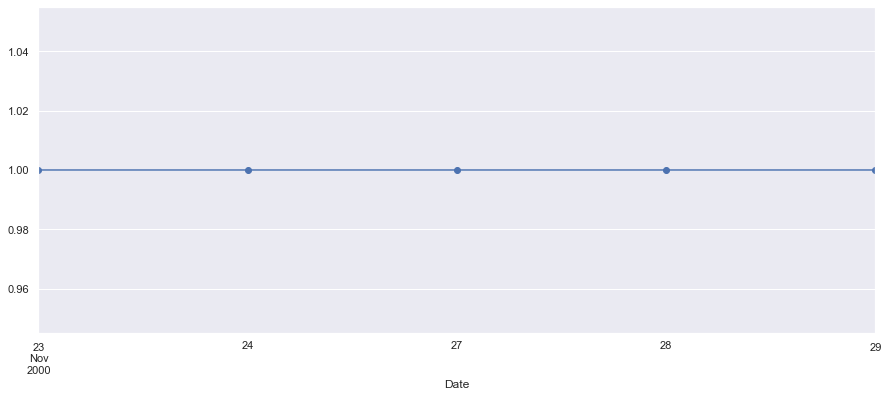

In [76]:
dfa.isna().head().any(1).mul(1).plot(marker='o')

<AxesSubplot:xlabel='Date'>

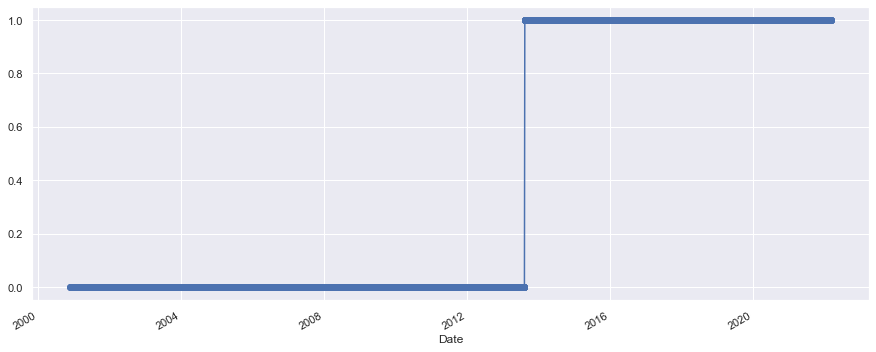

In [77]:
(~dfa.isna().any(1)).mul(1).plot(marker='o')

In [78]:
# Date when first all data available
dfa[(~dfa.isna().any(1))].iloc[0]

Close
VUN.TO    21.851347
XBB.TO    23.745413
XEC.TO    15.785608
XEF.TO    17.214560
ZCN.TO    13.304462
Name: 2013-08-12 00:00:00, dtype: float64

In [79]:
# Could be drastic?
df.dropna(axis=1, how='any', inplace=False)

DATA,Open,High,Low,Close,Volume
Date,,,,,
2013-08-12,21.851347,21.851347,21.833547,21.851347,7300.0
2013-08-13,21.993764,22.002665,21.940361,22.002665,2100.0
2013-08-14,21.958162,21.958162,21.851352,21.869154,6300.0
2013-08-15,21.717836,21.717836,21.486416,21.486416,8400.0
2013-08-16,21.539822,21.602127,21.459716,21.486416,5400.0
...,...,...,...,...,...
2022-03-04,75.809998,75.879997,74.900002,75.379997,29300.0
2022-03-07,75.099998,75.400002,73.529999,73.529999,54800.0
2022-03-08,73.669998,75.279999,73.209999,73.629997,54300.0


<AxesSubplot:xlabel='Date'>

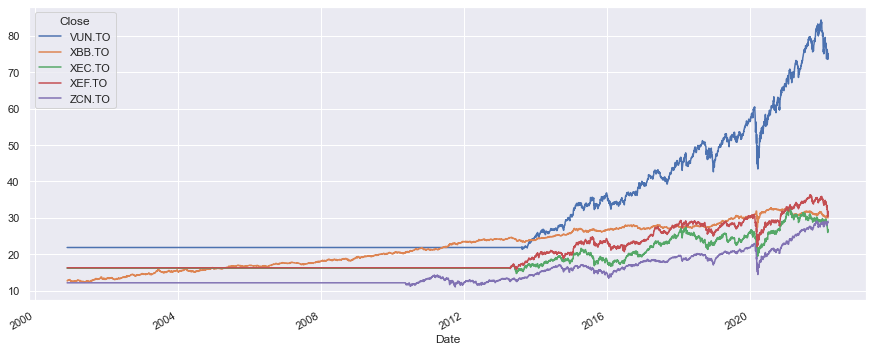

In [80]:
fu.fill_nan_data(dfa).plot()

<AxesSubplot:xlabel='Date'>

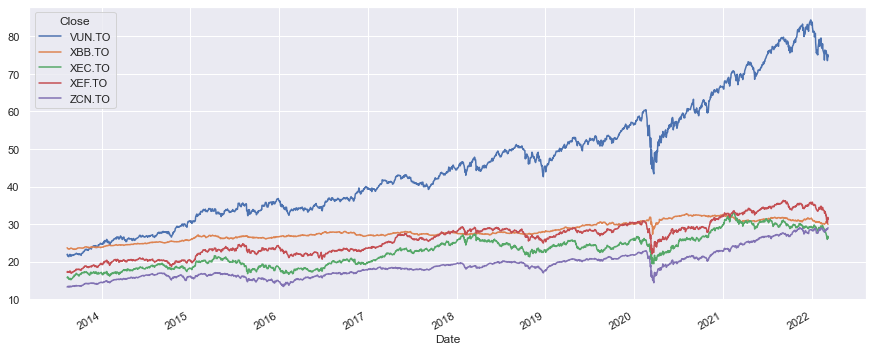

In [81]:
# Plot when data start to be valid for all stocks
dfa[(~dfa.isna().any(1))].plot()

<AxesSubplot:xlabel='Date'>

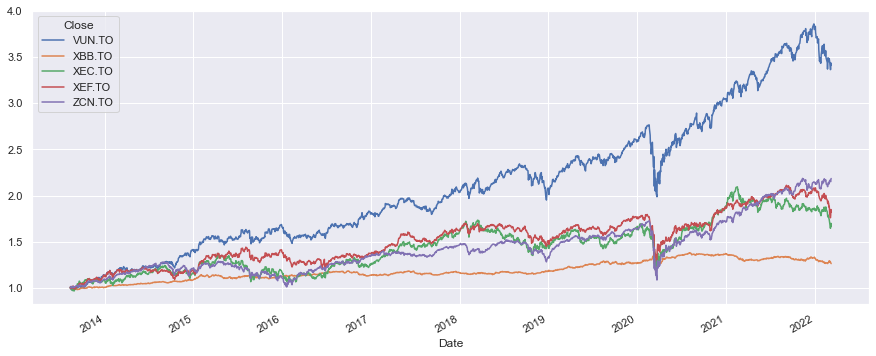

In [82]:
# Plot normalized data from valid
dfn = fu.normalize_data_frame(dfa[(~dfa.isna().any(1))])
dfn.plot()

In [83]:
dfn.describe()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
count,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000
mean,2.103304,1.184336,1.444542,1.519518,1.434377
std,0.718620,0.101178,0.268187,0.267901,0.282933
min,0.977597,0.980945,0.965879,0.986144,1.000000
25%,1.551517,1.125517,1.197275,1.318534,1.221805
50%,1.999893,1.162113,1.453684,1.533086,1.382213
75%,2.490109,1.275374,1.623175,1.672698,1.561346
max,3.860815,1.379070,2.095089,2.111419,2.186138


# Stock Comparision
... with normalized data (of course)

<AxesSubplot:xlabel='Date'>

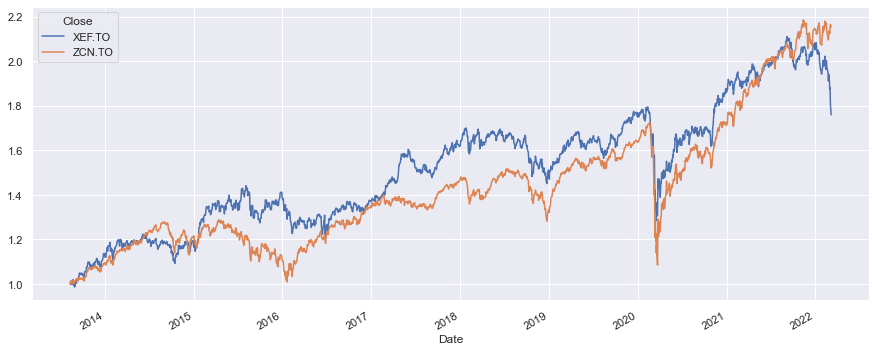

In [51]:
dfn[['XEF.TO', 'ZCN.TO']].plot()

<AxesSubplot:xlabel='Date'>

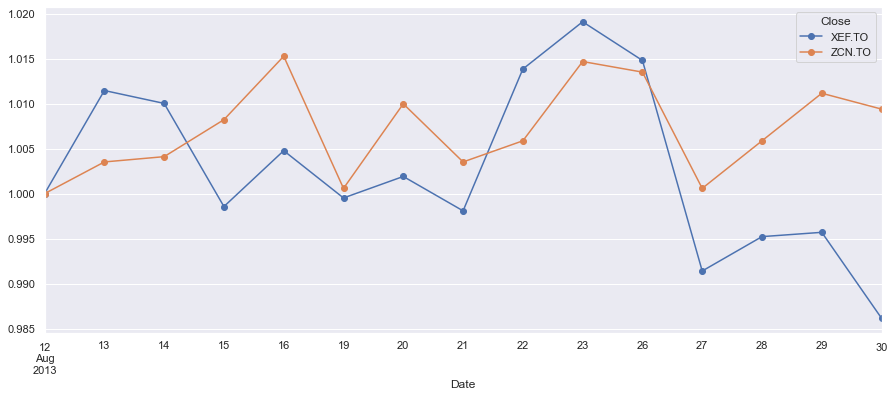

In [52]:
dfn[['XEF.TO', 'ZCN.TO']][0:15].plot(marker='o')

<AxesSubplot:xlabel='Date'>

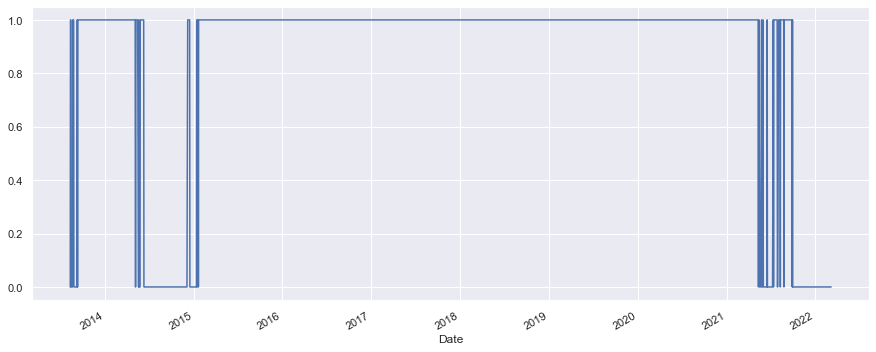

In [53]:
((dfn['XEF.TO'] > dfn['ZCN.TO']) * 1).plot()

<AxesSubplot:xlabel='Date'>

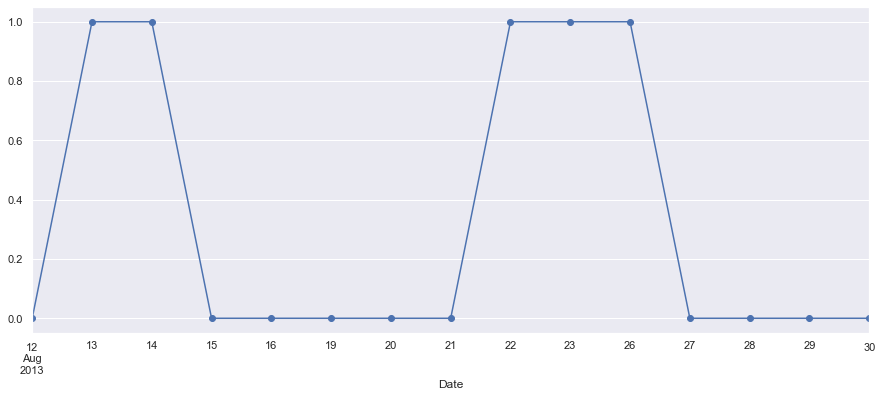

In [54]:
((dfn['XEF.TO'] > dfn['ZCN.TO']) * 1)[0:15].plot(marker='o')

In [55]:
x1 = dfn['XEF.TO']
x2 = dfn['ZCN.TO']

<AxesSubplot:xlabel='Date'>

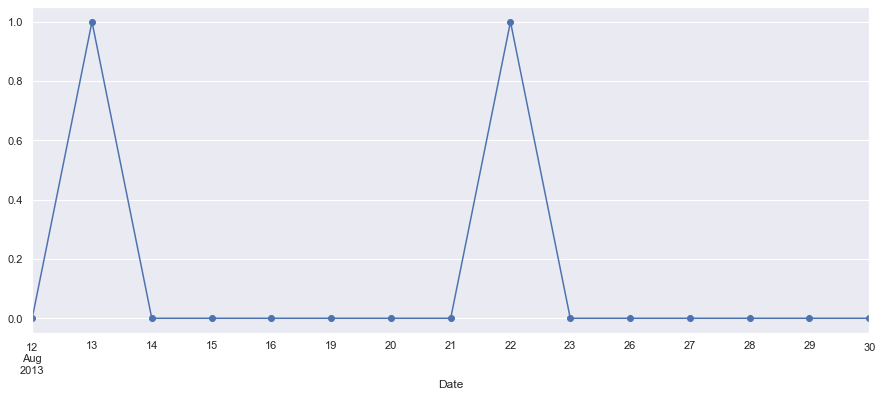

In [56]:
((((x1 > x2) * 1).diff() > 0) * 1)[0:15].plot(marker='o')

In [57]:
a1 = np.array([1, 1, 2, 3, 5, 8])
np.diff(a1)

array([0, 1, 1, 2, 3])

In [58]:
len(_)

5

In [59]:
s1 = pd.Series(a1)
s1.diff()

0    NaN
1    0.0
2    1.0
3    1.0
4    2.0
5    3.0
dtype: float64

In [60]:
len(_)

6

In [61]:
x = ti.cross_over(dfn['XEF.TO'], dfn['ZCN.TO'])
x

array([0., 1., 0., ..., 0., 0., 0.])

In [62]:
# output is numpy array
type(x)

numpy.ndarray

In [63]:
x1.index

DatetimeIndex(['2013-08-12', '2013-08-13', '2013-08-14', '2013-08-15',
               '2013-08-16', '2013-08-19', '2013-08-20', '2013-08-21',
               '2013-08-22', '2013-08-23',
               ...
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-07'],
              dtype='datetime64[ns]', name='Date', length=2150, freq=None)

<AxesSubplot:xlabel='Date'>

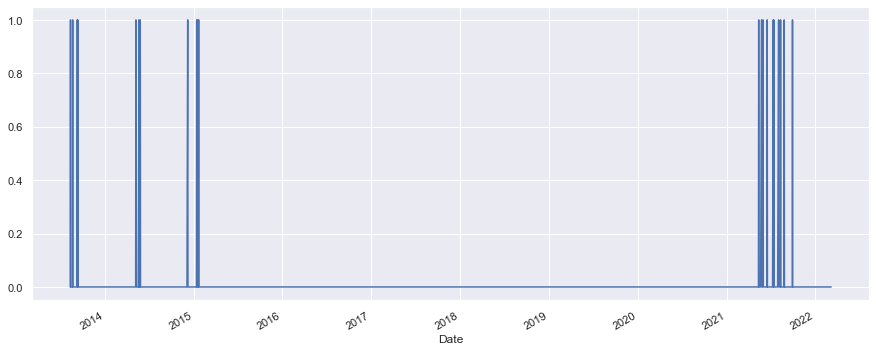

In [64]:
# Can create a new series from original index
pd.Series(x, index=x1.index).plot()